## Stylometric Analysis
Stylometry is the statistical analysis of variations in writing style between different writers.<br><br>
Used to determine which author wrote a piece of unknown literature.<br>
Here, we search for features that discriminate among the autors under consideration.<br>
To determine an author's characteristic features, one can search for the elements/words that the author uses consistently.<br><br>
We use Project Gutenberg to identify work by a specific authors.
<br><br>
5 author categories. 
<br><br>
Technique: author's style of writing or signature can be found by finding how often he/she uses different length of words.


### Tokenization
A token is a piece, so a word is a token in a sentence and a sentence is a token in a paragraph. Tokenization is the process of splitting a string into a list of tokens. Tokenizer that divides a string into substrings by splitting on the specified string.<br>
We will be using NLTK (Natual Language ToolKit): 

- **word_tokenize()** PunktLanguageVars class: used to find the words and punctuation in a string. Separates words using spaces and punctuations.

- WhitespaceTokenizer class **WhitespaceTokenizer()**: tokenizes a string on whitespace (space,tab,newline) 

- TweetTokenizer class **TweetTokenizer()**: Tokenizer for tweets

- WordPunctTokenizer class **WordPunctTokenizer()**: tokenizes a text into a sequence of alphabetic and non-alphabetic characters. splits all punctuations into separate tokens. 

- RegexTokenizer class **RegexpTokenizer()**: splits a string into substrings using a regular expression. 

- PunktSentenceTokenizer class


https://www.nltk.org/api/nltk.tokenize.html



In [5]:
'''
>>> import nltk
>>> nltk.download('punkt')
on Anaconda prompt
'''
from nltk import word_tokenize
text = "Hey @airindia, not #flyinghigher these days we heard? #StayingParkedStayingSafe #LetsIndiGo"
tokens = word_tokenize(text)
print(tokens)

['Hey', '@', 'airindia', ',', 'not', '#', 'flyinghigher', 'these', 'days', 'we', 'heard', '?', '#', 'StayingParkedStayingSafe', '#', 'LetsIndiGo']


In [6]:
from nltk.tokenize import WhitespaceTokenizer
tokens = WhitespaceTokenizer().tokenize(text)
print(tokens)

['Hey', '@airindia,', 'not', '#flyinghigher', 'these', 'days', 'we', 'heard?', '#StayingParkedStayingSafe', '#LetsIndiGo']


In [7]:
from nltk.tokenize import WordPunctTokenizer
tokens = WordPunctTokenizer().tokenize(text)
print(tokens)

['Hey', '@', 'airindia', ',', 'not', '#', 'flyinghigher', 'these', 'days', 'we', 'heard', '?', '#', 'StayingParkedStayingSafe', '#', 'LetsIndiGo']


In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
print(tokens)

['Hey', 'airindia', 'not', 'flyinghigher', 'these', 'days', 'we', 'heard', 'StayingParkedStayingSafe', 'LetsIndiGo']


In [9]:
from nltk.tokenize import TweetTokenizer
tokens = TweetTokenizer().tokenize(text)
print(tokens)

['Hey', '@airindia', ',', 'not', '#flyinghigher', 'these', 'days', 'we', 'heard', '?', '#StayingParkedStayingSafe', '#LetsIndiGo']


## Stylometry

In [18]:
path = "C:\\Users\\Michelle\\Documents\\Cummins\\Sem6\\JOCPython\\NLP_docs\\data\\"

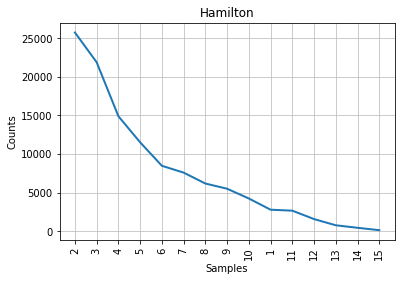

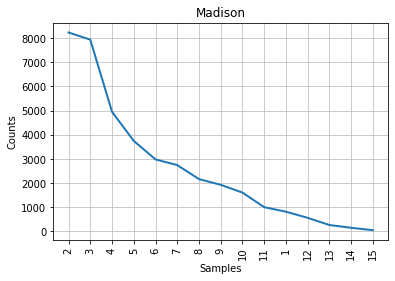

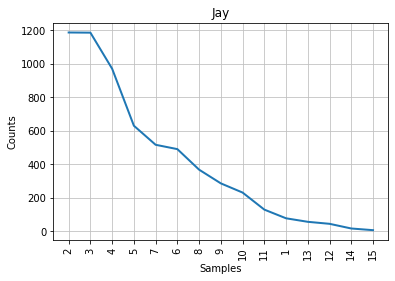

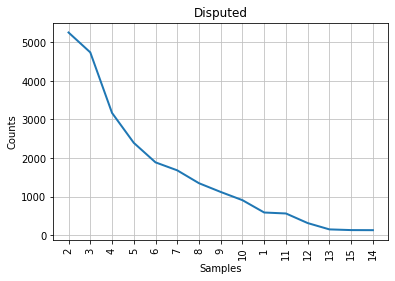

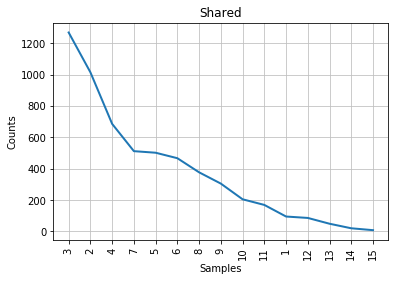

{('Hamilton', 'Madison', 'Jay', 'Disputed', 'Shared'): FreqDist({3: 1268, 2: 1014, 4: 685, 7: 511, 5: 501, 6: 466, 8: 376, 9: 304, 10: 204, 11: 168, ...})}


In [20]:
import nltk 

papers = {'Madison':[10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
          'Hamilton':[1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                      25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                      61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                      78, 79, 80, 81, 82, 83, 84, 85],
                      'Jay':[2, 3, 4, 5],
                      'Shared':[18,19,20],
                      'Disputed':[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63]}

def read_files(filename):
    strings=[]
    for file in filename:
        with open(path+f'federalist_{file}.txt') as f:
            strings.append(f.read())
            
    return('\n'.join(strings))
    

fedaralist_by_author={}
for author,files in papers.items():
    fedaralist_by_author[author]=read_files(files)
      

authors=('Hamilton','Madison','Jay','Disputed','Shared') # create tuple for author names

author_tokens={}
length_distribution={}

for author in authors:
    tokens=nltk.word_tokenize(fedaralist_by_author[author])
    author_tokens[author]=[token for token in tokens if any(c.isalpha() for c in token)] #only alphabets
    token_lengths =[ len(token)for token in author_tokens[author]] #how many words of a certain length are there
    length_distribution[authors]= nltk.FreqDist(token_lengths)
    length_distribution[authors].plot(15,title=author) #plotted for each author
    
for author in length_distribution:
    print(length_distribution)    